In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt

In [2]:
larger_df = pd.read_csv('winemag-data_first150k.csv')

In [22]:
larger_df.tail(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150909,150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150910,150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros
150912,150912,France,The nose is dominated by the attractive scents...,Les Charmes,87,65.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Daniel Rion
150913,150913,France,"Inky and rustic, yet in a refined manner. This...",NaN,94,30.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style Red Blend,Le Vieux Donjon
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer
150916,150916,US,An impressive wine that presents a full bouque...,J. Schram,93,65.0,California,Napa Valley,Napa,Champagne Blend,Schramsberg
150917,150917,France,"Light and elegant, this spicy, lively wine is ...",Brut Mosaïque,92,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150918,150918,France,"Jacquart makes a full-bodied, ripe style of Ch...",Cuvée Mosaïque,92,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart


# ANOVA MANUAL

In [4]:
print('~~~~~~~~~~~Row before dropping NAs: {}~~~~~~~~~~~'.format(len(larger_df)))
larger_df.dropna(subset=['price'], inplace=True)
print('~~~~~~~~~~~Row after dropping NAs: {}~~~~~~~~~~~'.format(len(larger_df)))


~~~~~~~~~~~Row before dropping NAs: 150930~~~~~~~~~~~
~~~~~~~~~~~Row after dropping NAs: 137235~~~~~~~~~~~


In [23]:
# Collect Data 
samples = 1000
max_price = 200
seed = 42

# Pull Italy
italy = larger_df[(larger_df.country=='Italy') & (larger_df.price<max_price)].sample(samples, random_state=seed)

# Pull US
united_states = larger_df[(larger_df.country=='US') & (larger_df.price<max_price)].sample(samples, random_state=seed)

# Pull France 
france = larger_df[(larger_df.country=='France') & (larger_df.price<max_price)].sample(samples, random_state=seed)


data_list = [italy, united_states, france]
wine_df = pd.concat(data_list)

wine_df.country.value_counts()


Italy     1000
France    1000
US        1000
Name: country, dtype: int64

C:\Users\iqbal agistany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iqbal agistany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iqbal agistany\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

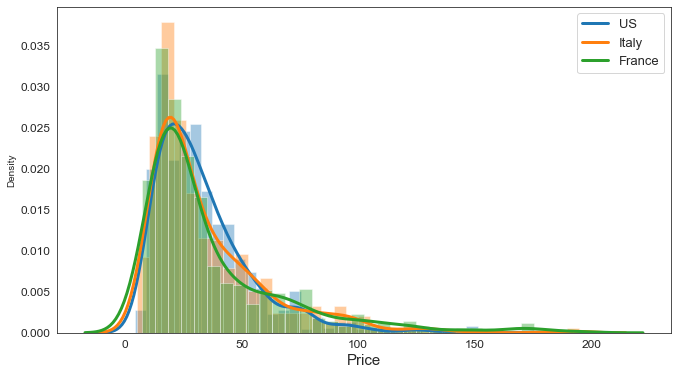

In [24]:
# Plot Price Distributions 
sns.set_style("white")
plt.figure(figsize=(11, 6))

for name in ['US', 'Italy', 'France']:
    sns.distplot(wine_df[wine_df.country==name].price, kde_kws=dict(linewidth=3))
    
plt.legend(['US', 'Italy', 'France'], fontsize=13)
plt.xlabel('Price', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('distributions.png')

plt.show()

In [9]:
wine_df.groupby('country').mean()['price']

country
France    37.242
Italy     35.286
US        33.776
Name: price, dtype: float64

In [10]:
# Calculate Means 
mean_france = wine_df[wine_df.country == 'France']['price'].mean()
mean_italy = wine_df[wine_df.country == 'Italy']['price'].mean()
mean_us = wine_df[wine_df.country == 'US']['price'].mean()
mean_overall = wine_df['price'].mean()

# Calculate Variances 
var_france = wine_df[wine_df.country == 'France']['price'].var()
var_italy = wine_df[wine_df.country == 'Italy']['price'].var()
var_us = wine_df[wine_df.country == 'US']['price'].var()


In [11]:
# Sum of Squares Between
SSB = 1000*(mean_overall - mean_france)**2 + \
      1000*(mean_overall - mean_italy)**2 + \
      1000*(mean_overall - mean_us)**2 

print('Sum of Squares Between: {0:.6g}'.format(SSB))


# Sum of Squares Within 
SSW = 1000*var_france + \
      1000*var_italy + \
      1000*var_us

print('Sum of Squares Within: {0:.9g}'.format(SSW))


# Degrees of Freedom 
dof_SSB = 2
dof_SSW = 3000-3

print('Degrees of Freedom for SSB: {}'.format(dof_SSB))
print('Degrees of Freedom for SSW: {}'.format(dof_SSW))


# F Stastics 
f_stat = (SSB/dof_SSB) / (SSW/dof_SSW)

print('F-Statistic: {0:.6g}'.format(f_stat))



Sum of Squares Between: 6039.73
Sum of Squares Within: 2226089.55
Degrees of Freedom for SSB: 2
Degrees of Freedom for SSW: 2997
F-Statistic: 4.06567


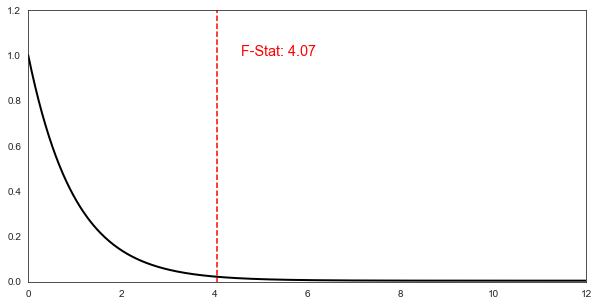

In [12]:
# F Distribution 
plt.figure(figsize=(10, 5))
plt.xlim(0,12)
plt.ylim(-.005,1.2)

# Plot
dist = f(dfn=dof_SSB, dfd=dof_SSW, loc=0, scale=1)
x = np.linspace(dist.ppf(0.000001), dist.ppf(0.99999999), 1000)
y = dist.pdf(x) 

# Plot Figure
plt.plot(x,y, '-', color='black', linewidth=2)
plt.vlines(f_stat, color='red', ymin=-1, ymax=1.2, linestyle='--')
plt.text(x=f_stat+.5, y=1, s='F-Stat: {:.2f}'.format(f_stat), fontsize='x-large', color='red')

plt.savefig('f_distribution.png')

plt.show()

# ANOVA OTOMATIS

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
# ANOVA Test 
model = ols('price ~ country', data=wine_df).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
country,6.039731e+03,2.0,4.069736,0.017176
Residual,2.223863e+06,2997.0,NaN,NaN
